<a href="https://colab.research.google.com/github/k-k-n-vishal/Ml-notebooks-learn/blob/main/ExploreHouse_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##             HousePrice Prediction dataset (Source Kaggle)



## It's a continous type dataset so that we selecting the regression type algorithm(Multi-variable)

## ModeBuild work flow


*   Build Diffrent regression algorithms(Multi-variable) with essential and basic hyperparameters
*   Choosing the best accuracy score with the above mentioned workflow and tuning the hyperparameter.


*   For exmaple running **n** diffrent algorithm so we get **n%** output score choose the top most accuracy score and tune the hyper parameter for the top accuracy the algorithms.


## Data preprocessing





## Loading Base Libs

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Dataset

In [92]:
dataset = pd.read_csv('kc_house_data.csv')

## Data Insights


*   Base stat info about the dataset
*   Check for is there is any null values



In [93]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [94]:
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Droping some features

In [95]:
dataset.drop(["id", "date"], axis=1, inplace=True)

## Correlation visualization heatmap overall

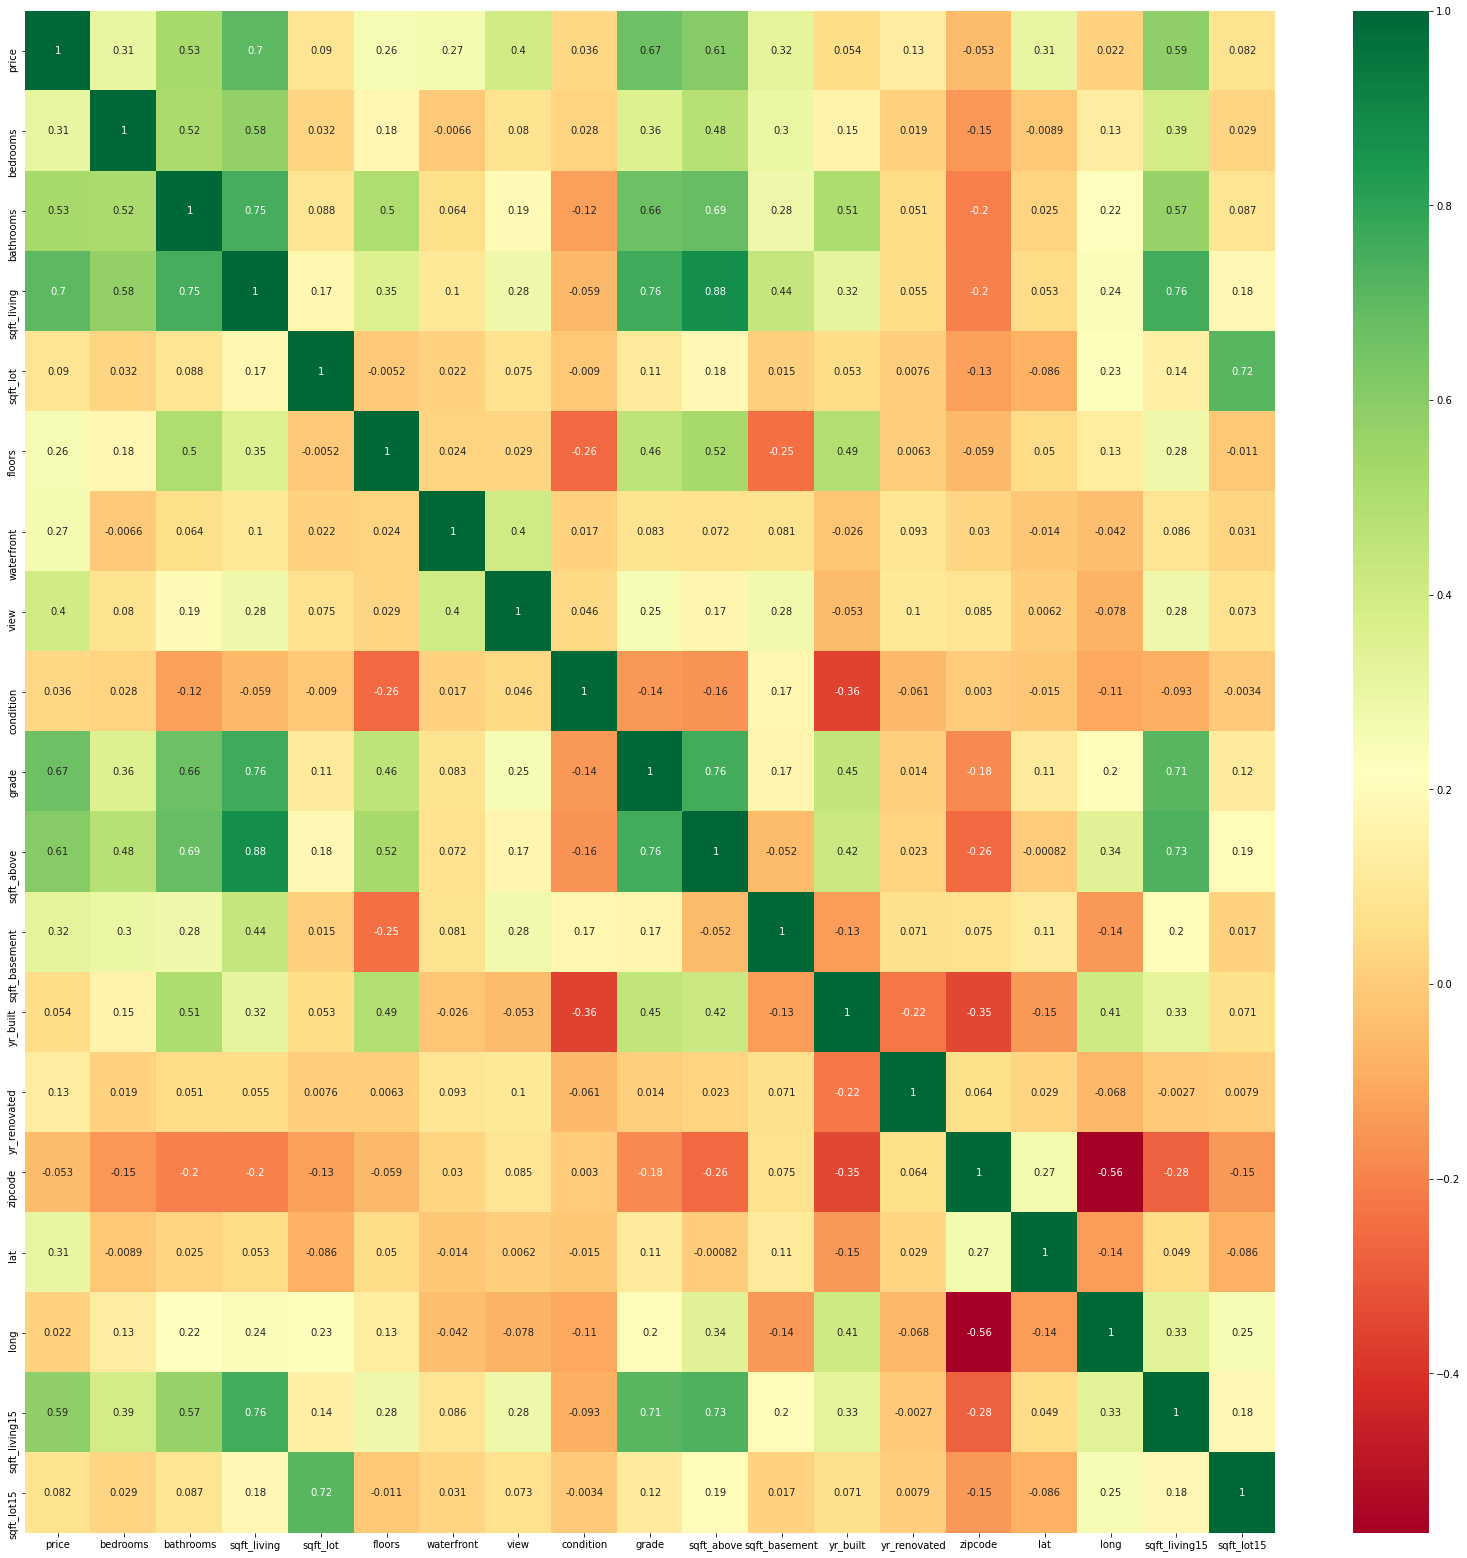

In [96]:
plt.subplots(figsize=(28,28))
sns.heatmap(dataset.corr(), annot=True , cmap = "RdYlGn")

## Correlation value with respective **Variable to be predicted**

In [97]:
dataset.corrwith(dataset['price'])

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
dtype: float64

## Visualize each feature's behavoiur with price feature

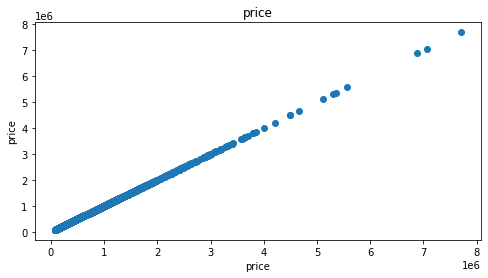

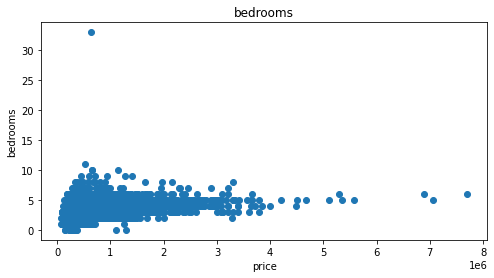

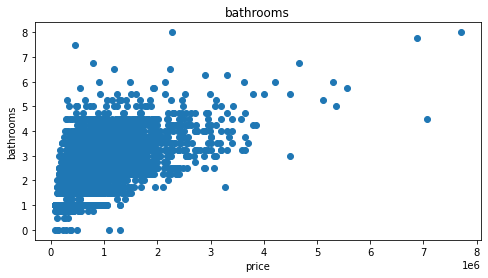

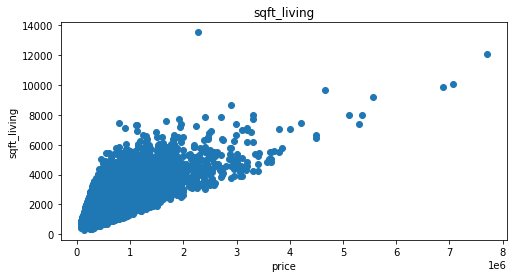

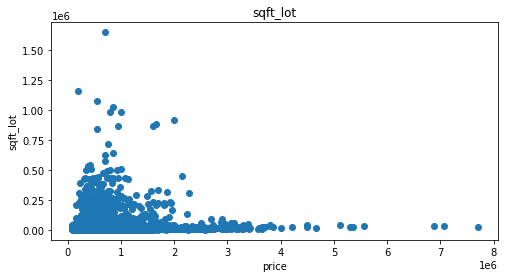

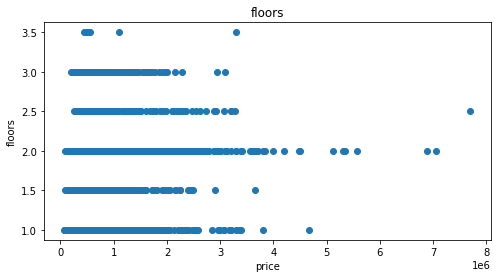

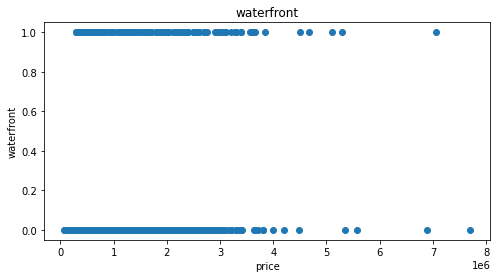

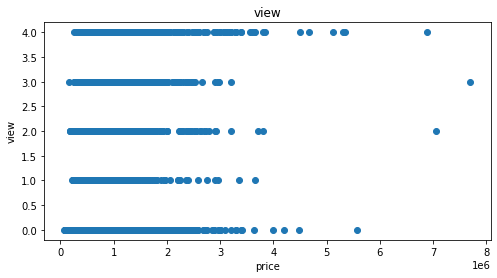

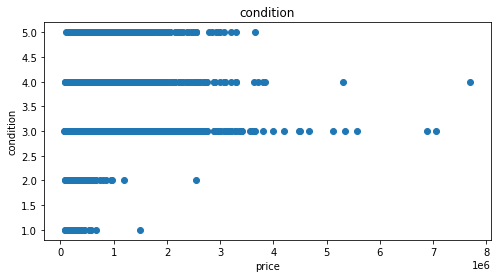

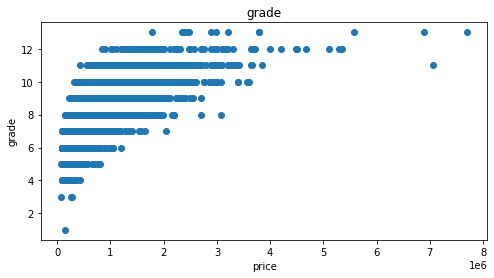

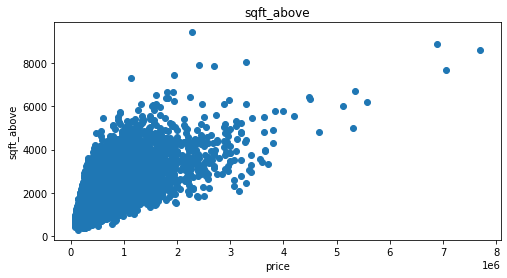

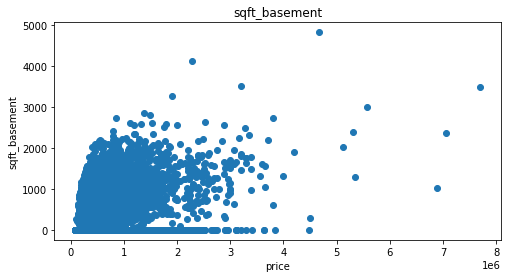

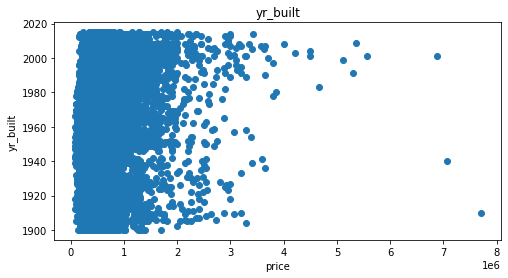

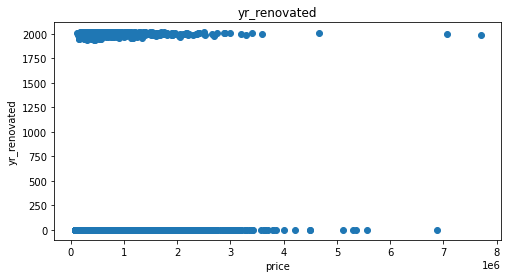

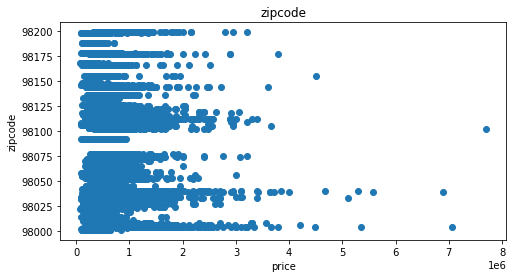

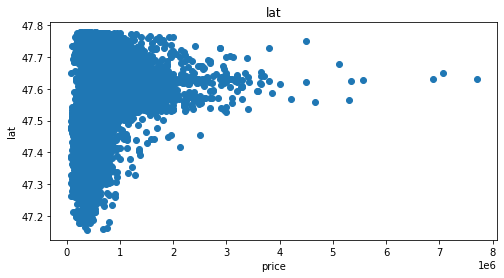

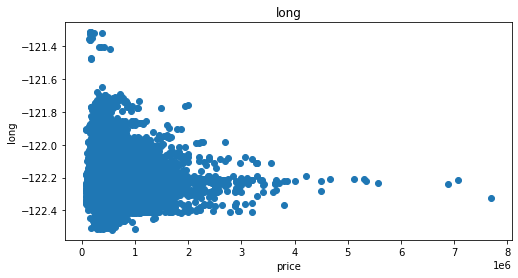

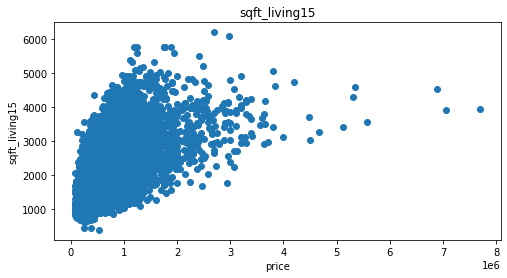

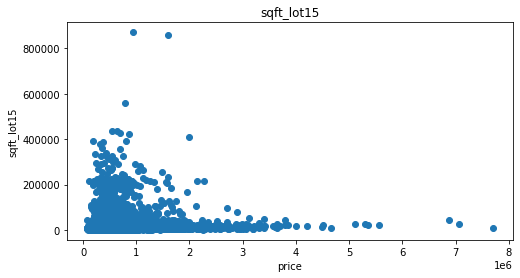

In [98]:
cols = dataset.columns
for f in cols:
    plt.figure(figsize=(8,4))
    plt.scatter(dataset['price'], dataset[f])
    plt.title(f)
    plt.xlabel('price')
    plt.ylabel(f)
    plt.show()

## Final view of data before feature selection

In [99]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Visualilze each feature colums with Histogram

*   Visualize features with count to understand how features are distributed with counts(total observation)


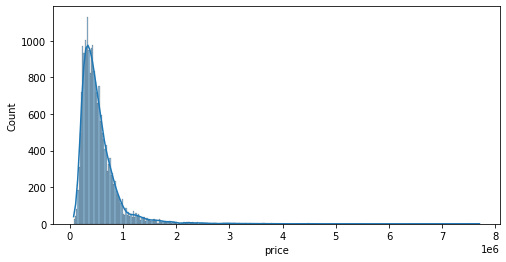

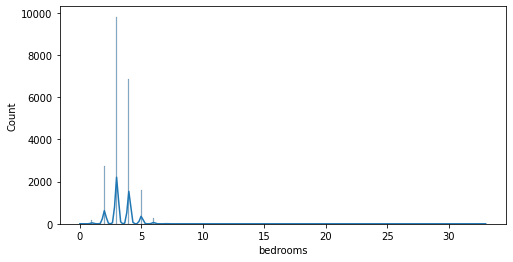

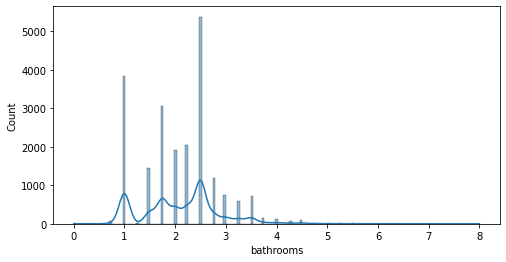

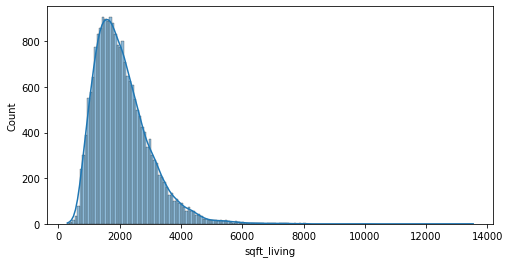

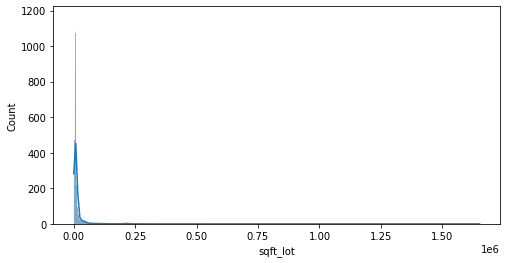

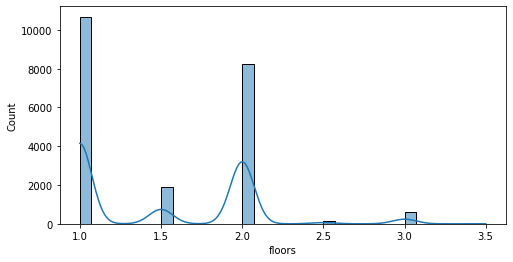

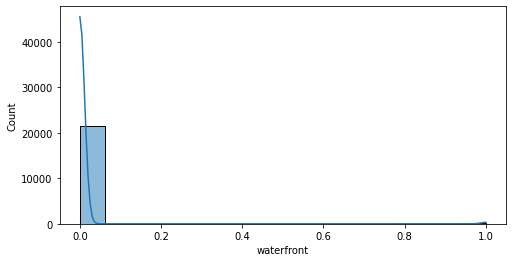

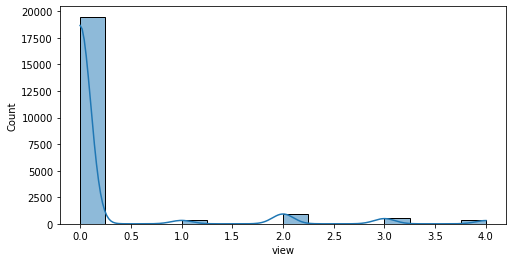

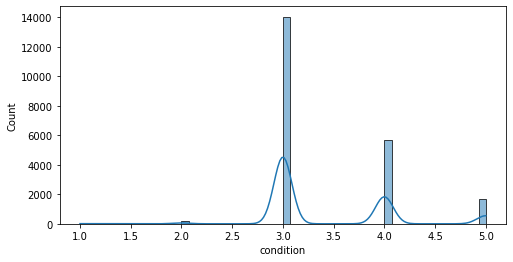

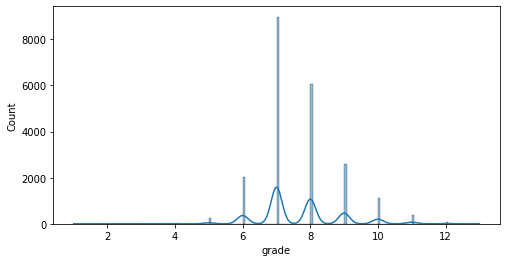

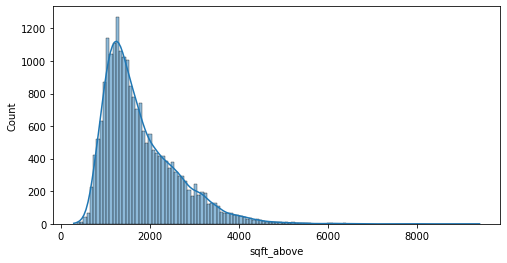

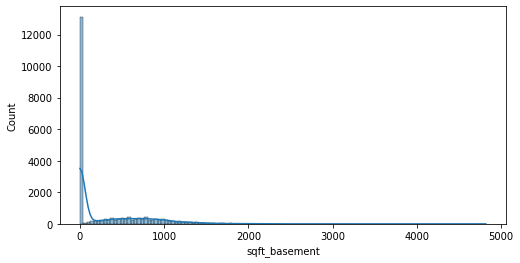

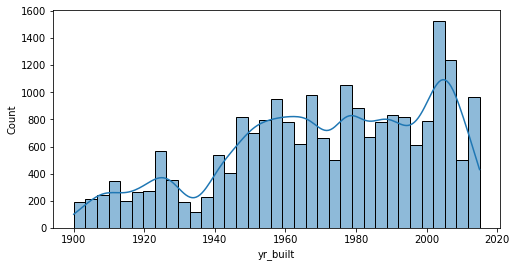

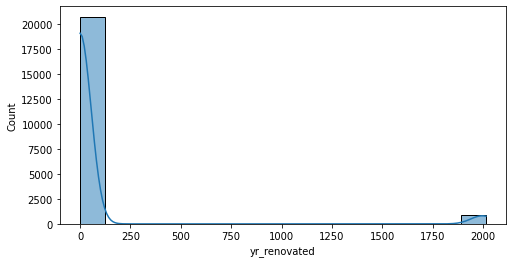

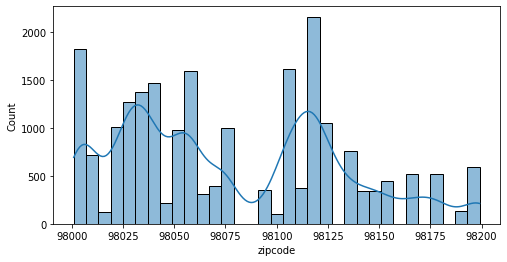

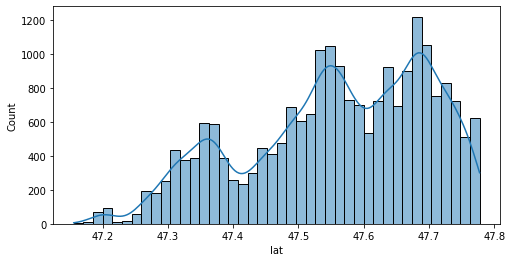

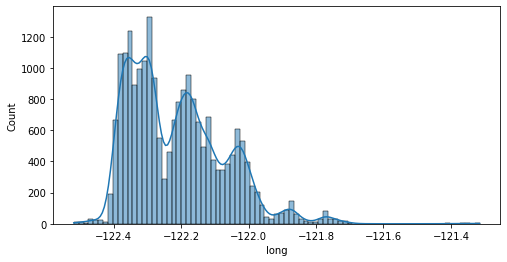

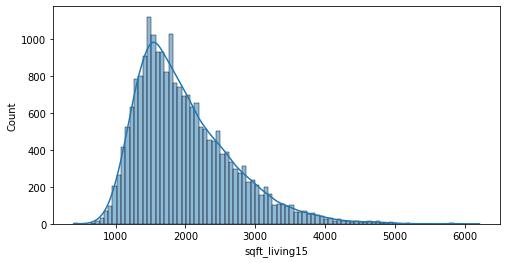

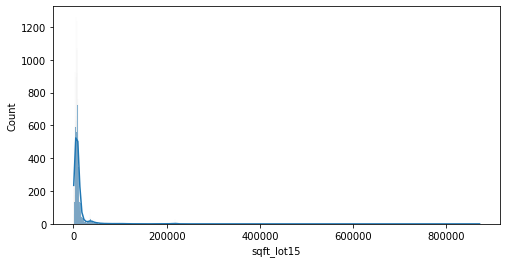

In [100]:
total_columns = dataset.columns

for k in total_columns:
  plt.figure(figsize=(8,4))
  sns.histplot(data=dataset, x=k, stat="count", kde=True)


## Selecting features

In [101]:
X = dataset.iloc[:, 1:19].values
y = dataset.iloc[:, 0:1].values

## Feature selection dimension

In [102]:
print("Shape of X feature",X.shape)
print("Shape of y feature", y.shape)

Shape of X feature (21613, 18)
Shape of y feature (21613, 1)


## Splitting the dataset into the Training set and Test set

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [104]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_Y.fit_transform(y_train)

## Train our data against diffrent regression algorithms


*   Support vector regression 
*   Decision Tree regression

*   Random forest regression

## Choose the best model out of the below (**Model is trained base params**) and improve the model with tuning





In [121]:
from sklearn.metrics import r2_score

## Support vector Regression Base build -1

In [105]:
from sklearn.svm import SVR
sv_regressor = SVR()
sv_regressor.fit(X_train, y_train.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [106]:
sv_regressorPred = sc_Y.inverse_transform(sv_regressor.predict(sc_X.transform(X_test)))

In [107]:
Sv_results1 = r2_score(y_test, sv_regressorPred)
print('Support vector Regression :', Sv_results1)

Support vector Regression : 0.7995637818037695


## Decision Tree Regression build - 1

In [108]:
from sklearn.tree import DecisionTreeRegressor
DesTree_regressor = DecisionTreeRegressor(random_state = 0)
DesTree_regressor.fit(X_train, y_train.ravel())

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [109]:
desTree_pred = sc_Y.inverse_transform(DesTree_regressor.predict(sc_X.transform(X_test)))

In [110]:
desTree_Result = r2_score(y_test, desTree_pred)
print("Decision Tree Regresion : ",desTree_Result)

Decision Tree Regresion :  0.7855817198602819


## Random_forest Regression build - 1

In [111]:
from sklearn.ensemble import RandomForestRegressor
Rand_regressor = RandomForestRegressor()
Rand_regressor.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [112]:
Rand_regPredict = sc_Y.inverse_transform(Rand_regressor.predict(sc_X.transform(X_test)))

In [113]:
RandReg_result = r2_score(y_test, Rand_regPredict)
print("Random Forest Regression : ", RandReg_result)

Random Forest Regression :  0.892194573427092


In [115]:
print("The output from the 3 Models")
print("Random Forest Regression :  0.892194573427092")
print("Support vector Regression : 0.7995637818037695")
print("Decision Tree Regresion :  0.7855817198602819")

The output from the 3 Models
Random Forest Regression :  0.892194573427092
Support vector Regression : 0.7995637818037695
Decision Tree Regresion :  0.7855817198602819


## Random Forest tune

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 400]
}

rand_regressor = RandomForestRegressor()


# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rand_regressor, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train.ravel())

grid_search.best_params_


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 30.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 40.9min finished


{'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 400}

## Tuning Model with Best params

In [117]:
Rand_regressor1 = RandomForestRegressor(bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=3, 
                                       min_samples_split=8, n_estimators=400)

Rand_regressor1.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [118]:
Rand_regPredict1 = sc_Y.inverse_transform(Rand_regressor1.predict(sc_X.transform(X_test)))

## Model perfomance after the Tuning

In [120]:
new_RandReg_result = r2_score(y_test, Rand_regPredict)
print("Random Forest Regression after hyperTuning : ", new_RandReg_result)

Random Forest Regression after hyperTuning :  0.892194573427092


## Conclusion



*   The model perfomance with base defaut params-- **Random Forest Regression :  0.892194573427092**
*   The model perfomance with **best parameters** -- **Random Forest Regression after hyperTuning :  0.892194573427092**

## So the both model with diffrent parmeters are perfom same

